In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("merge_result.csv")
reactspeed = pd.read_csv("reactspeedURLhaus_inminutes.csv")

exploded_data=data.assign(tags=data.tags.str.split(",")).explode('tags')
data_withcountry=pd.merge(exploded_data,reactspeed[['AS_Number','Country']],on="AS_Number",how="left")

In [3]:
data_withcountry.head()

,Unnamed: 0,id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter,AS_Number,Country
0,0,544165,9/17/2020 10:10,http://115.98.1.103:56034/Mozi.a,offline,malware_download,None,https://urlhaus.abuse.ch/url/544165/,lrz_security,17488,IN
1,1,544163,9/17/2020 10:10,http://115.97.82.185:47119/Mozi.m,online,malware_download,elf,https://urlhaus.abuse.ch/url/544163/,lrz_security,17488,IN
2,1,544163,9/17/2020 10:10,http://115.97.82.185:47119/Mozi.m,online,malware_download,Mozi,https://urlhaus.abuse.ch/url/544163/,lrz_security,17488,IN
3,2,544164,9/17/2020 10:10,http://115.97.83.180:58110/Mozi.m,online,malware_download,elf,https://urlhaus.abuse.ch/url/544164/,lrz_security,17488,IN
4,2,544164,9/17/2020 10:10,http://115.97.83.180:58110/Mozi.m,online,malware_download,Mozi,https://urlhaus.abuse.ch/url/544164/,lrz_security,17488,IN


In [49]:
country_per_tag = data_withcountry.groupby('tags')['Country'].nunique().sort_values().to_frame(name='unique_country_num')
tagcount = data_withcountry['tags'].value_counts()
asn_per_tag = data_withcountry.groupby('tags')['AS_Number'].nunique().sort_values().to_frame(name='ASN_uniq')

In [50]:
tag=pd.merge(tagcount,country_per_tag,how='left',left_index=True,right_index=True)
tagasn=pd.merge(tagcount,asn_per_tag,how='left',left_index=True,right_index=True)

In [51]:
tag[tag['tags']>=20]

,tags,unique_country_num
elf,89369,75
Mozi,53709,65
32-bit,35483,59
mips,34233,41
exe,6727,53
emotet,6148,64
heodo,5912,64
doc,5496,60
Trickbot,3658,4
opendir,3124,3


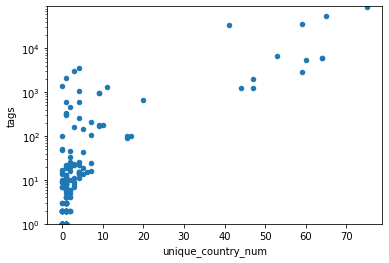

In [52]:
tag.plot(y='tags',
         x='unique_country_num',
         kind='scatter',
         logy=True,
         ylim=(1,90000)
        )

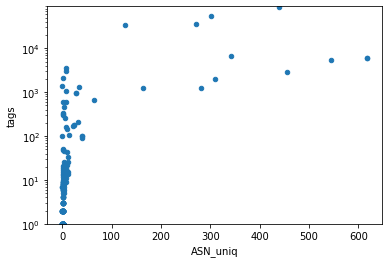

In [53]:
tagasn.plot(y='tags',
         x='ASN_uniq',
         kind='scatter',
         logy=True,
         ylim=(1,90000)
        )

In [58]:
tagasn[tagasn['tags']>=100].sort_values('ASN_uniq')

,tags,ASN_uniq
ono72,103,0
ono66,1415,0
ono70,2089,1
IcedID,590,2
shathak,338,2
USA,326,2
TA551,303,2
geofenced,467,4
bazaloader,263,5
opendir,3124,7
